In [101]:
# importing Libraries

import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,8)

## Data Gathering

In [102]:
# Loading the weRateDogs twitter archive dataset into a dataframe

archive = pd.read_csv('twitter-archive-enhanced.csv')

In [103]:
# downloading the image_predictions.tsv file programatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

if not os.path.exists('image_predictions.tsv'):
    response = requests.get(url)
    with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)

In [104]:
#loading the image_predictions.tsv into a dataframe

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [105]:
# setting up access to Twitter's API
'''
consumer_key = ""
consumer_secret = ""

auth = tweepy.OAuth2AppHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

# getting the status of a single tweet id

tweet = api.get_status(892420643555336193)
'''

'\nconsumer_key = ""\nconsumer_secret = ""\n\nauth = tweepy.OAuth2AppHandler(consumer_key, consumer_secret)\napi = tweepy.API(auth)\n\n# getting the status of a single tweet id\n\ntweet = api.get_status(892420643555336193)\n'

In [106]:
#tweet

In [107]:
#tweet._json

In [108]:
#tweet._json.keys()

In [109]:
# downloading the json objects for all the tweet ids in the WeRateDogs twitter archive dataset

tweet_id = archive["tweet_id"]

if not os.path.exists('tweet_json.txt'):                                 # checks to see if the tweet_json.txt file exists
    with open('tweet_json.txt', 'w', encoding='utf-8') as file:          # creates tweet_json.txt file if it doesn't exist
        for id in tweet_id:
            try:
                json_tweet = api.get_status(id, tweet_mode='extended')
                json.dump(json_tweet._json, file)
                file.write('\n')
            except:
                print('Could not retrieve status of tweet with ID of {}.'.format(id))
        

In [110]:
# extract tweet_id, favorite_count, retweet_count from the 'tweet_json.txt' file, creates a dictionary and appends it to a list

tweet_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line)
        id = data['id']
        fav_count = data['favorite_count']
        ret_count = data['retweet_count']
        tweet_list.append({'tweet_id':id, 'favorite_count': int(fav_count), 'retweet_count': int(ret_count)})
        

#tweet_list

In [111]:
# creates a dataframe from the list of dictionaries object tweet_list

favorites_retweets_count = pd.DataFrame(tweet_list, columns=['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data

In [112]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [113]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [114]:
favorites_retweets_count

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33834,7016
1,892177421306343426,29351,5302
2,891815181378084864,22070,3483
3,891689557279858688,36962,7229
4,891327558926688256,35338,7768
...,...,...,...
1766,669583744538451968,1324,806
1767,669573570759163904,388,120
1768,669571471778410496,1409,884
1769,669567591774625800,202,45


In [115]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [116]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [117]:
favorites_retweets_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1771 non-null   int64
 1   favorite_count  1771 non-null   int64
 2   retweet_count   1771 non-null   int64
dtypes: int64(3)
memory usage: 41.6 KB


In [118]:
archive.source.sample(10)

48      <a href="http://twitter.com/download/iphone" r...
887     <a href="http://twitter.com/download/iphone" r...
1011    <a href="http://vine.co" rel="nofollow">Vine -...
1784    <a href="http://twitter.com/download/iphone" r...
114     <a href="http://twitter.com/download/iphone" r...
1199    <a href="http://twitter.com/download/iphone" r...
1939    <a href="http://twitter.com/download/iphone" r...
1304    <a href="http://twitter.com/download/iphone" r...
1135    <a href="http://twitter.com/download/iphone" r...
1627    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [119]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [120]:
archive['text'].sample(30)

1978    Very happy pup here. Always smiling. Loves his...
280     Meet Winston. He knows he's a little too big f...
441     This is Howie. He just bloomed. 11/10 revoluti...
706     This is Dallas. Her tongue is ridiculous. 11/1...
1691    This is Glacier. He's a very happy pup. Loves ...
548     Meet Sansa and Gary. They run along the fence ...
2095    Meet Vincent. He's a wild Adderall Cayenne. Sh...
613     This is Tyr. He's just checking on you. Nifty ...
1652    Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...
2028    Meet Dylan. He can use a fork but clearly can'...
986     Meet Winston. He's pupset because I forgot to ...
1259    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...
1944    This is Riley. She's just an adorable football...
758     RIP Loki. Thank you for the good times. You wi...
1830    This is Kenneth. He's stuck in a bubble. 10/10...
1129    Meet Pupcasso. You can't afford his art. 13/10...
1666    NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...
1838    I'm su

In [121]:
archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [122]:
archive.iloc[[0]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [123]:
archive.iloc[[362]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
362,829449946868879360,NaN,NaN,2017-02-08 22:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829449946...,11,10,None,doggo,None,None,None


In [124]:
archive.text[362]

"Here's a stressed doggo. Had a long day. Many things on her mind. The hat communicates these feelings exquisitely. 11/10 https://t.co/fmRS43mWQB"

In [125]:
archive[archive['text'].str[:2] == 'RT']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [126]:
archive['expanded_urls'].sample(10)

2228    https://twitter.com/dog_rates/status/668256321...
1820    https://twitter.com/dog_rates/status/676588346...
1955    https://twitter.com/dog_rates/status/673636718...
1979    https://twitter.com/dog_rates/status/672980819...
429     https://twitter.com/dog_rates/status/821107785...
1484    https://twitter.com/dog_rates/status/693231807...
563     https://twitter.com/dog_rates/status/802572683...
1630    https://twitter.com/dog_rates/status/684538444...
259     https://twitter.com/dog_rates/status/843235543...
643     https://twitter.com/dog_rates/status/793195938...
Name: expanded_urls, dtype: object

In [127]:
archive["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [128]:
sorted(archive["name"].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [129]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [130]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [131]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [132]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [133]:
archive.duplicated().sum()

0

In [134]:
image_predictions.duplicated().sum()

0

In [135]:
favorites_retweets_count.duplicated().sum()

0

In [136]:
all_columns = pd.Series(list(archive) + list(image_predictions) + list(favorites_retweets_count))

all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [137]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [138]:
favorites_retweets_count.describe()

,tweet_id,favorite_count,retweet_count
count,1.771000e+03,1771.000000,1771.000000
mean,7.511360e+17,7935.994353,2730.433089
std,7.328937e+16,11368.556479,4114.465866
min,6.695645e+17,0.000000,1.000000
25%,6.801837e+17,1374.000000,558.000000
50%,7.091796e+17,3107.000000,1360.000000
75%,8.176570e+17,10595.500000,3234.000000
max,8.924206e+17,124194.000000,51732.000000


## Quality Issues

## WeRateDogs Twitter archive dataset

* tweet_id column is of type int instead of string
* Contains columns with retweet data and rows with retweet related data
* source column values represented using HTML link tags
* source column type is string object instead of category
* timestamp column is a string and not a datetime object
* expanded urls column contain dead links
* wrong values for name in the name column. e.g 'a', 'all', 'such', 'this', an', 'by', 'his', 'just', 'life', 'my',   'not', 'old', 'one', 'such', 'the', 'very'
* the text column contains retweets
* contains ratings that are not for dogs

## image predictions dataset

* tweet_id column is of type int instead of string
* missing records: `2075 entries` as compared to `2356 entries` in the twitter archive dataset
* not all predictions are dog related
* some values in the `p1, p2, p3` columns are lower case while others are upper case


## favorite_retweet_count dataset

* tweet_id column is of type int instead of string
* missing records: `1771 entries` as compared to the `2356 entries` in the twitter archive dataset

## Tidiness Issues

### WeRateDogs Twitter archive dataset
* Four variables (doggo, floofer, pupper, puppo) in 4 columns in the twiiter archive dataset 

### image predictions dataset

* breed and prediction columns should be calculated and added to the dataset
* image_predictions table should be part of the archive table

### favorite_retweet_count dataset

* favorite_retweet_count table should be part of the archive table

## Cleaning Data

In [139]:
# Making copies of our datasets

archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
favorites_retweets_count_clean = favorites_retweets_count.copy()

# Quality

`tweet_id` column in the achive_clean, image_predictions_clean, favorites_retweets_count_clean tables should be converted to string using the astype function

### Code 

In [140]:
archive_clean['tweet_id'] = archive_clean.tweet_id.astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean.tweet_id.astype(str)
favorites_retweets_count_clean['tweet_id'] = favorites_retweets_count_clean.tweet_id.astype(str)

### Test 

In [141]:
# Verifying that the data type of the tweet_id column in all the three tables have been changed to string (object) 
archive_clean['tweet_id'].dtype

dtype('O')

In [142]:
image_predictions_clean['tweet_id'].dtype

dtype('O')

In [143]:
favorites_retweets_count_clean['tweet_id'].dtype

dtype('O')

### WeRateDogs Twitter archive dataset

`Columns with retweet data` (in_reply_to_status_id,  in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id, retweeted_status_timestamp)

### Define

All the index of rows with retweet related columns should be obtained and be used to drop those rows before dropping the columns

### Code

In [144]:
# index of rows with reply columns ('in_reply_to_status_id', 'in_reply_to_user_id') related data 
reply_columns = archive_clean[pd.notnull(archive_clean['in_reply_to_status_id'])].index


# index of rows with retweet columns ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',) related data 
retweet_columns = archive_clean[pd.notnull(archive_clean['retweeted_status_id'])].index


In [145]:
reply_columns

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [146]:
retweet_columns

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [147]:
#Function for dropping rows or columns
def drop_rows_cols(df, row_col, axis=0, inplace=True):
    ''' Drops Rows or Columns. Set axis=1 to drop columns and 0 which is the default to drop rows'''
    return df.drop(row_col, axis=axis, inplace=inplace)

#Dropping specified rows
drop_rows_cols(archive_clean, reply_columns)
drop_rows_cols(archive_clean, retweet_columns)

### Test

In [148]:
#confirming that all the rows with reply columns ('in_reply_to_status_id', 'in_reply_to_user_id') and retweet columns ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') related data have been dropped

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Code

In [149]:
# droping the reply columns ('in_reply_to_status_id', 'in_reply_to_user_id') and retweet columns ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')
# including the expanded_urls column

columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
drop_rows_cols(archive_clean, columns, axis=1)

### Test

In [150]:
# verifying the removal of the specified columns

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(2), object(9)
memory usage: 196.6+ KB


In [151]:
# Verifying that the text columns no longer contain retweets

archive_clean[archive_clean['text'].str[:2] == 'RT']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1286,708400866336894977,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,12,10,None,None,None,None,None
1860,675489971617296384,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,10,10,None,None,None,None,None


In [152]:
# droping rows with retweets records
retweets = archive_clean[archive_clean['text'].str[:2] == 'RT'].index

drop_rows_cols(archive_clean, retweets)

In [153]:
# verifying that the archive_clean dataset no longer contain retweet records
archive_clean[archive_clean['text'].str[:2] == 'RT']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`source column` values represented using HTML link tags

### Define

`source column` values should be replaced with `source value`  without `HTML Tags` using `.replace` method

### Code

In [154]:
# Using .extract method to retrieve source values located between opening and closing HTML anchor tags

archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')


### Test

In [155]:
# verifying that source values have been successfully retrieved
archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

`source column` type is string object instead of category

### Define

`source column` type should be changed to category type using the `astype` function.

### Code

In [156]:
# converting the source column type from string to category

archive_clean.source = archive_clean['source'].astype('category')

### Test

In [157]:
# verifying that the source column type has been changed
archive_clean['source'].dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
, ordered=False)

`timestamp column is a string and not a datetime object`

### Define

`timestamp` column should be converted to a datetime object using pandas `to_datetime()` function

### Code

In [158]:
# converting the timestamp column from a string to a datetime object

archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [159]:
# verifying that the timestamp column type has been changed to a datetime object

archive_clean.timestamp.dtype

datetime64[ns, UTC]

`name` column contains names that are not used as dog names such as 'a', 'None', 'all', 'such', 'this', an', 'by', 'his', 'just', 'life', 'my',   'not', 'old', 'one', 'such', 'the', 'very'

### Define 

* Convert all wrong name values including None into Nan values using `.apply() and .replace() methods` 

### Code

In [160]:
# Converting all wrong name values including None into 'None'
archive_clean['name'] = archive_clean['name'].apply(lambda x: x if str(x).lower() != x else 'None')

### Test

In [161]:
# Confirming that all wrong name values have been replaced with np.nan values

archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

contains ratings that are not for dogs

### Define

* identify ratings that are not for dogs using `str.match() function` and remove them

### Code

In [162]:
# looking at records that aren't related to dog ratings

archive_clean[archive_clean['text'].str.match('.* we only rate dogs')]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
193,855459453768019968,2017-04-21 16:33:22+00:00,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",12,10,None,None,None,None,None
869,761745352076779520,2016-08-06 02:06:59+00:00,Twitter for iPhone,Guys.. we only rate dogs. Pls don't send any m...,11,10,None,None,None,None,None
1085,738184450748633089,2016-06-02 01:44:22+00:00,Twitter for iPhone,"For the last time, we only rate dogs. Pls stop...",9,10,None,None,None,None,None
1225,714141408463036416,2016-03-27 17:25:54+00:00,Twitter for iPhone,"I know we only rate dogs, but since it's Easte...",10,10,None,None,None,None,None
1726,680055455951884288,2015-12-24 16:00:30+00:00,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",10,10,Sammy,None,None,None,None


In [163]:
# selectng the index and removing ratings that are not for dogs
not_dogs = archive_clean[archive_clean['text'].str.match('.* we only rate dogs')].index

drop_rows_cols(archive_clean, not_dogs)

### Test

In [164]:
# verifying that ratings that are not dog related have been removed

archive_clean[archive_clean['text'].str.match('.* we only rate dogs')]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Image Predictions Dataset

some values in the `p1, p2, p3` columns are lower case while others are upper case

### Define

* values in the `p1, p2, p3` columns should all be converted to lower case


### Code

In [165]:
# converting all values in the p1, p2, p3 columns to lower case values
image_predictions_clean.p1 = image_predictions_clean['p1'].apply(lambda x: str(x).lower())
image_predictions_clean.p2 = image_predictions_clean['p2'].apply(lambda x: str(x).lower())
image_predictions_clean.p3 = image_predictions_clean['p3'].apply(lambda x: str(x).lower())

### Test

In [166]:
# verifying that values in the p1, p2, p3 columns have all been converted to lower case values
image_predictions_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
988,miniature_pinscher,toy_terrier,chihuahua
477,llama,standard_poodle,teddy
1729,golden_retriever,pekinese,labrador_retriever
587,cash_machine,schipperke,german_shepherd
1230,seat_belt,chow,minibus
629,pomeranian,golden_retriever,chihuahua
727,german_shepherd,leonberg,bloodhound
1335,bookshop,cardigan,bernese_mountain_dog
1903,staffordshire_bullterrier,american_staffordshire_terrier,chesapeake_bay_retriever
1274,labrador_retriever,maltese_dog,golden_retriever


In [167]:
image_predictions_clean.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,shih-tzu,0.814405,True,lhasa,0.175220,True,pekinese,0.008072,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,rottweiler,0.068594,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,airedale,0.065649,True
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,pomeranian,0.615678,True,golden_retriever,0.126455,True,chihuahua,0.087184,True
498,675820929667219457,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,1,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,samoyed,0.201358,True,eskimo_dog,0.186789,True
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
1921,856526610513747968,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,1,old_english_sheepdog,0.798481,True,tibetan_terrier,0.060602,True,standard_poodle,0.040722,True
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,1,golden_retriever,0.565981,True,chow,0.081212,True,irish_terrier,0.061596,True


breed and prediction columns should be calculated and added to the dataset

### Define



### Code

In [168]:
# using conditions and choices to select breed of dogs and predictions values for the breed and prediction columns and then dropping columns

condition_breed = [(image_predictions_clean['p1_dog'] == True) & (image_predictions_clean['p2_dog'] == True) & (image_predictions_clean['p3_dog'] == True), (image_predictions_clean['p2_dog'] == True) & (image_predictions_clean['p3_dog'] == True), (image_predictions_clean['p3_dog'] == True) & (image_predictions_clean['p1_dog'] == True), (image_predictions_clean['p1_dog'] == True) & (image_predictions_clean['p2_dog'] == True)]
condition_pred = [(image_predictions_clean['p1_dog'] == True), (image_predictions_clean['p2_dog'] == True), (image_predictions_clean['p3_dog'] == True)]

choices_breed = [image_predictions_clean['p1'], image_predictions_clean['p2'], image_predictions_clean['p3'], image_predictions_clean['p1']]

choices_pred_conf = [image_predictions_clean['p1_conf'], image_predictions_clean['p2_conf'], image_predictions_clean['p3_conf']]

image_predictions_clean['breed'] = np.select(condition_breed, choices_breed, default='None') #text
image_predictions_clean['prediction'] = np.select(condition_pred, choices_pred_conf, default=0) #numbers that's why default is 0


# Dropping ('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') columns
columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

drop_rows_cols(image_predictions_clean, columns, axis=1)


### Test

In [169]:
#verifying that the breed and prediction values have been retrieved and added to the image_predictions_clean dataset and that the specified columns have been dropped
image_predictions_clean.sample(30)

,tweet_id,jpg_url,img_num,breed,prediction
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298
1303,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,pembroke,0.868511
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,soft-coated_wheaten_terrier,0.048928
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,None,0.000000
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,german_shepherd,0.717776
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,cocker_spaniel,0.073101
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,None,0.000000
347,672475084225949696,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg,1,None,0.000000
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,None,0.056850


## Tidiness Issue

`Four variables (doggo, floofer, pupper, puppo)` in 4 columns in the twitter archive dataset

### Define

* Create a new column called `dog_stage` and extract dog stage values form the `text` column using the `.extract() method

### Code

In [170]:
#extracting dog stage values from the text column using the `.extract() method and adding the values to the dog_stage column

archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#dropping columns
columns=['doggo', 'floofer', 'pupper', 'puppo']
drop_rows_cols(archive_clean, columns, axis=1)

### Test

In [171]:
# verifying that a new column called dog_stage with extracted values has been created and that 4 columns have been dropped
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [172]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2090 non-null   object             
 1   timestamp           2090 non-null   datetime64[ns, UTC]
 2   source              2090 non-null   category           
 3   text                2090 non-null   object             
 4   rating_numerator    2090 non-null   int64              
 5   rating_denominator  2090 non-null   int64              
 6   name                2090 non-null   object             
 7   dog_stage           353 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 132.9+ KB


# Tidiness Issue

The `image_predictions_clean` and the `favorites_retweets_count_clean` tables should be part of the `archive_clean` table

### Define

Use pandas `.merge` function to combine all three tables

### Code

In [173]:
# merging the archive_clean and the favorites_retweets_count_clean tables

archive_fav_ret_count_clean = archive_clean.merge(favorites_retweets_count_clean, on='tweet_id', how='left')

# merging the combined tables of archive_clean and favorites_retweets_count_clean to image_predictions_clean

archive_clean_master = archive_fav_ret_count_clean.merge(image_predictions_clean, on='tweet_id', how='left')

### Test

In [174]:
archive_clean_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,33834.0,7016.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,29351.0,5302.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,22070.0,3483.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,36962.0,7229.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,None,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,35338.0,7768.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


In [175]:
archive_clean_master.sample(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,prediction
673,761292947749015552,2016-08-04 20:09:17+00:00,Twitter for iPhone,Meet Bonaparte. He's pupset because it's cloud...,11,10,Bonaparte,NaN,4201.0,1002.0,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1.0,standard_poodle,0.660893
913,728751179681943552,2016-05-07 00:59:55+00:00,Twitter for iPhone,This is Flurpson. He can't believe it's not bu...,10,10,Flurpson,NaN,NaN,NaN,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1.0,saint_bernard,0.482050
414,808344865868283904,2016-12-12 16:16:49+00:00,Vine - Make a Scene,This is Seamus. He's very bad at entering pool...,11,10,Seamus,NaN,40254.0,19467.0,NaN,NaN,NaN,NaN
1152,701214700881756160,2016-02-21 01:19:47+00:00,Twitter for iPhone,"I'm not sure what's happening here, but it's p...",12,10,None,NaN,11304.0,4647.0,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1.0,chihuahua,0.615163
595,776088319444877312,2016-09-14 16:00:49+00:00,Twitter for iPhone,I can't tap the screen to make the hearts appe...,10,10,None,NaN,1718.0,141.0,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3.0,None,0.000077
196,845812042753855489,2017-03-26 01:38:00+00:00,Twitter for iPhone,We usually don't rate polar bears but this one...,13,10,None,NaN,27085.0,7889.0,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1.0,samoyed,0.979803
1418,683098815881154561,2016-01-02 01:33:43+00:00,Twitter for iPhone,aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,12,10,None,NaN,2001.0,590.0,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1.0,golden_retriever,0.889848
191,846514051647705089,2017-03-28 00:07:32+00:00,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,doggo,41286.0,10411.0,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2.0,golden_retriever,0.650003
305,826476773533745153,2017-01-31 17:06:32+00:00,Twitter for iPhone,This is Pilot. He has mastered the synchronize...,12,10,Pilot,doggo,17396.0,3896.0,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1.0,german_shepherd,0.741860
1445,681579835668455424,2015-12-28 20:57:50+00:00,Twitter for iPhone,This is Apollo. He thought you weren't coming ...,8,10,Apollo,NaN,3259.0,1180.0,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1.0,rottweiler,0.760671


In [176]:
archive_clean_master.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,prediction
2085,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311
2086,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,rhodesian_ridgeback,0.408143
2087,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,german_shepherd,0.596461
2088,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,NaN,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826
2089,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,welsh_springer_spaniel,0.465074


In [177]:
archive_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2090 non-null   object             
 1   timestamp           2090 non-null   datetime64[ns, UTC]
 2   source              2090 non-null   category           
 3   text                2090 non-null   object             
 4   rating_numerator    2090 non-null   int64              
 5   rating_denominator  2090 non-null   int64              
 6   name                2090 non-null   object             
 7   dog_stage           353 non-null    object             
 8   favorite_count      1550 non-null   float64            
 9   retweet_count       1550 non-null   float64            
 10  jpg_url             1965 non-null   object             
 11  img_num             1965 non-null   float64            
 12  breed               1965 non-null 

## Assess

* There are missing records in the image predictions section of the archive_clean_master table

In [178]:
# index of rows with missing image prediction data

no_prediction = archive_clean_master[archive_clean_master['jpg_url'].isnull()].index

no_prediction

Int64Index([  32,   38,   65,   73,   78,   95,  113,  153,  155,  192,
            ...
            1499, 1506, 1516, 1531, 1546, 1562, 1573, 1588, 1659, 1949],
           dtype='int64', length=125)

## Clean

* Missing records in the image prediction section of the `archive_clean_master` table

### Define

* drop the rows with missing image prediction data

### Code

In [179]:
# dropping the rows with missing image prediction data
drop_rows_cols(archive_clean_master, no_prediction)

### Test 

In [180]:
# verifying that the rows with missing image prediction data has been dropped
archive_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 2089
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1965 non-null   object             
 1   timestamp           1965 non-null   datetime64[ns, UTC]
 2   source              1965 non-null   category           
 3   text                1965 non-null   object             
 4   rating_numerator    1965 non-null   int64              
 5   rating_denominator  1965 non-null   int64              
 6   name                1965 non-null   object             
 7   dog_stage           322 non-null    object             
 8   favorite_count      1459 non-null   float64            
 9   retweet_count       1459 non-null   float64            
 10  jpg_url             1965 non-null   object             
 11  img_num             1965 non-null   float64            
 12  breed               1965 non-null 

## Assess

* There are missing values in the favorite_count, retweet_count and dog_stage columns

In [181]:
archive_clean_master.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                     0
dog_stage             1643
favorite_count         506
retweet_count          506
jpg_url                  0
img_num                  0
breed                    0
prediction               0
dtype: int64

## Clean

missing values in the `favorite_count` and `retweet_count` columns

### Define

* fill missing values (nan) with zeros using numpy's `np.fillna()` function

In [182]:
# replacing nan's in the favorite_count and retweet_count columns with 0s
archive_clean_master['favorite_count'].fillna(0, inplace=True)
archive_clean_master['retweet_count'].fillna(0, inplace=True)

### Test

In [183]:
# verifying that nan's in the favorite_count and retweet_count columns have been replaced with 0s 
archive_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 2089
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1965 non-null   object             
 1   timestamp           1965 non-null   datetime64[ns, UTC]
 2   source              1965 non-null   category           
 3   text                1965 non-null   object             
 4   rating_numerator    1965 non-null   int64              
 5   rating_denominator  1965 non-null   int64              
 6   name                1965 non-null   object             
 7   dog_stage           322 non-null    object             
 8   favorite_count      1965 non-null   float64            
 9   retweet_count       1965 non-null   float64            
 10  jpg_url             1965 non-null   object             
 11  img_num             1965 non-null   float64            
 12  breed               1965 non-null 

In [184]:
archive_clean_master.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                     0
dog_stage             1643
favorite_count           0
retweet_count            0
jpg_url                  0
img_num                  0
breed                    0
prediction               0
dtype: int64

## Assess

> Only the dog_stage column has missing values

## Storing Data

In [185]:
# Saving the cleaned dataset to a csv file called twitter_archive_master.csv

archive_clean_master.to_csv("twitter_archive_master.csv", index=False)

# Analyzing and Visualizing Data

In [186]:
# loading the twitter_archive_master.csv file as a dataframe
archive_master = pd.read_csv("twitter_archive_master.csv")

In [187]:
# looking at 20 random samples of the dataset
archive_master.sample(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,prediction
134,859196978902773760,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,12,10,None,NaN,80642.0,26314.0,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1.0,None,0.216163
1821,668625577880875008,2015-11-23 03:02:14+00:00,Twitter for iPhone,This is Maks. Maks just noticed something wasn...,10,10,Maks,NaN,0.0,0.0,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1.0,None,0.054455
1344,680959110691590145,2015-12-27 03:51:18+00:00,Twitter for iPhone,This is Ozzie. He was doing fine until he lost...,9,10,Ozzie,NaN,4231.0,1825.0,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2.0,None,0.044357
460,793210959003287553,2016-10-31 22:00:04+00:00,Twitter for iPhone,This is Maude. She's the h*ckin happiest wasp ...,10,10,Maude,NaN,8489.0,2614.0,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1.0,french_bulldog,0.018759
520,782747134529531904,2016-10-03 01:00:34+00:00,Twitter for iPhone,This is Deacon. He's the happiest almost dry d...,11,10,Deacon,doggo,7079.0,1320.0,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1.0,golden_retriever,0.560699
1076,700151421916807169,2016-02-18 02:54:41+00:00,Twitter for iPhone,If a pupper gave that to me I'd probably start...,11,10,None,pupper,2062.0,611.0,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1.0,italian_greyhound,0.176838
569,773704687002451968,2016-09-08 02:09:06+00:00,Twitter for iPhone,This is Loki. He knows he's adorable. One ear ...,12,10,Loki,NaN,6246.0,1498.0,https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg,2.0,silky_terrier,0.324251
1819,668631377374486528,2015-11-23 03:25:17+00:00,Twitter for iPhone,Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,5,10,Zeek,NaN,0.0,0.0,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1.0,miniature_schnauzer,0.904549
1654,671561002136281088,2015-12-01 05:26:34+00:00,Twitter for iPhone,This is the best thing I've ever seen so sprea...,13,10,None,NaN,11405.0,6329.0,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1.0,gordon_setter,0.469373
1609,672622327801233409,2015-12-04 03:43:54+00:00,Twitter for iPhone,This lil pupper is sad because we haven't foun...,12,10,None,pupper,1151.0,423.0,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1.0,golden_retriever,0.952773


In [188]:
# dataset dimension
archive_master.shape

(1965, 14)

In [189]:
# dataset information
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1965 non-null   int64  
 1   timestamp           1965 non-null   object 
 2   source              1965 non-null   object 
 3   text                1965 non-null   object 
 4   rating_numerator    1965 non-null   int64  
 5   rating_denominator  1965 non-null   int64  
 6   name                1965 non-null   object 
 7   dog_stage           322 non-null    object 
 8   favorite_count      1965 non-null   float64
 9   retweet_count       1965 non-null   float64
 10  jpg_url             1965 non-null   object 
 11  img_num             1965 non-null   float64
 12  breed               1965 non-null   object 
 13  prediction          1965 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 215.0+ KB


## Assess

* `timestamp` column type is `string` instead of `datetime`
* `source` column type is `string` instead of `category`
* `dog_stage` column type is `string` instead of `category`

## Clean

`timestamp` column type is `string` instead of `datetime`

`source` column type is `string` instead of `category`

`dog_stage` column type is `string` instead of `category`

### Define 

* `timestamp` column type should be converted to a `datetime` object using pandas  `to_datetime` function
* `source` column type should be converted to a `category` type using the `astype` function
* `dog_stage` column type should be converted to a `category` type using the `astype` function

### Code

In [190]:
# converting from string to datetime and category objects respectively
archive_master.timestamp = pd.to_datetime(archive_master['timestamp'])
archive_master.source = archive_master['source'].astype('category')
archive_master.dog_stage = archive_master['dog_stage'].astype('category')

# Test

In [191]:
# verifying that the data type of the specified columns have been changed
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1965 non-null   int64              
 1   timestamp           1965 non-null   datetime64[ns, UTC]
 2   source              1965 non-null   category           
 3   text                1965 non-null   object             
 4   rating_numerator    1965 non-null   int64              
 5   rating_denominator  1965 non-null   int64              
 6   name                1965 non-null   object             
 7   dog_stage           322 non-null    category           
 8   favorite_count      1965 non-null   float64            
 9   retweet_count       1965 non-null   float64            
 10  jpg_url             1965 non-null   object             
 11  img_num             1965 non-null   float64            
 12  breed               1965 non-null 

In [192]:
# Looking at the summary statistical information of our dataset
archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,prediction
count,1.965000e+03,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,7.360373e+17,12.229008,10.478880,6651.308397,1861.916031,1.202036,0.466421
std,6.754752e+16,41.697417,6.863685,10929.407252,3531.881006,0.559491,0.339635
min,6.660209e+17,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,6.758531e+17,10.000000,10.000000,0.000000,0.000000,1.000000,0.141257
50%,7.088109e+17,11.000000,10.000000,2267.000000,722.000000,1.000000,0.461164
75%,7.881506e+17,12.000000,10.000000,8973.000000,2256.000000,1.000000,0.777562
max,8.924206e+17,1776.000000,170.000000,124194.000000,51732.000000,4.000000,0.999956


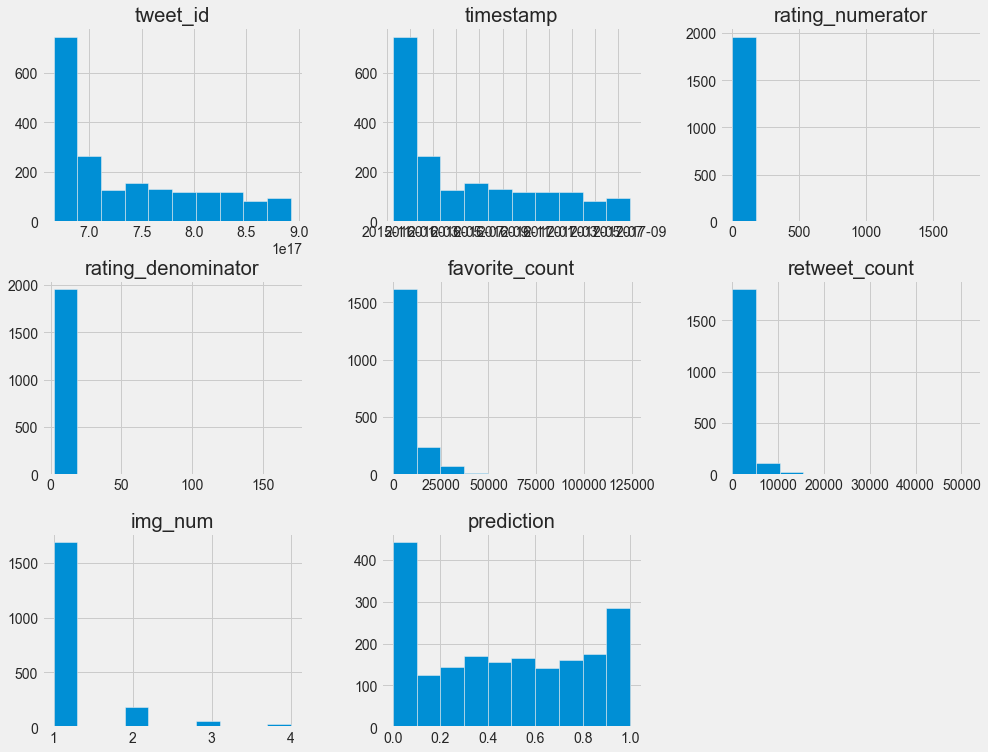

In [193]:
# visualizing the distribution of data in our dataset
archive_master.hist(figsize=(15,12));

### Conclusion

* From the .describe() method we are able to calculate the `min`, `max`, `mean`, `std`, `percentile (25%, 50%, 75%) values` of all numeriacl columns in the dataset.

* Visualizing the distribution of values for all numerical variables in the dataset with a `histogram` show mostly right skewed distributions.

## Question 1: Top five most popularly Rated dog breeds

In [194]:
# calculating the most popularly Rated dog breeds
archive_master.breed.value_counts()

None                  456
golden_retriever      147
labrador_retriever     92
pembroke               90
chihuahua              72
                     ... 
entlebucher             1
silky_terrier           1
groenendael             1
komondor                1
standard_schnauzer      1
Name: breed, Length: 112, dtype: int64

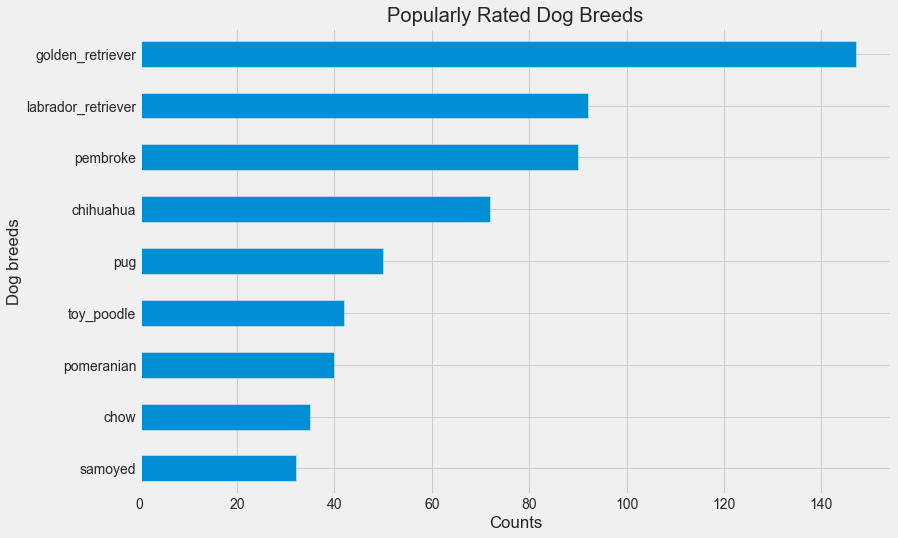

In [195]:
# visualizing the most popularly Rated dog breeds using an horizontal bar chart
archive_master.breed.value_counts()[1:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Popularly Rated Dog Breeds')
plt.ylabel('Dog breeds')
plt.xlabel('Counts')
plt.show()

# Conclusion

> From the calculations and visualizations above involving the `breed` column, the five most popularly Rated dog breeds are:
> * golden_retriever
> * labrador_retriever  
> * pembroke    
> * chihuahua
> * pug

## Question 2: The most used source for posting tweets on the WeRateDogs Twitter Account

In [196]:
# counting the number of tweets posted using each source
archive_master.source.value_counts()

Twitter for iPhone    1927
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

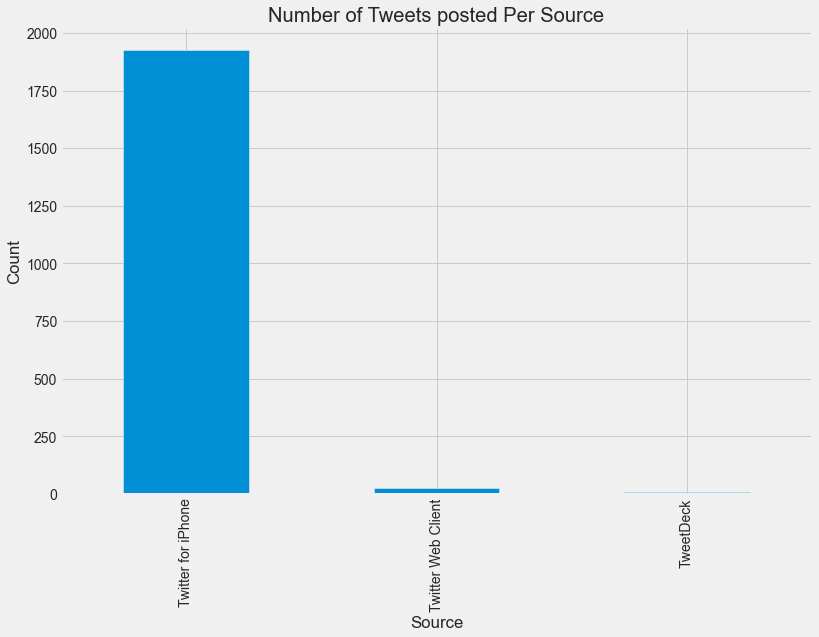

In [197]:
# visualizing the number of tweets posted using each source with the aid of a bar chart
archive_master.source.value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Source")
plt.title("Number of Tweets posted Per Source")
plt.show()


# Conclusion

> From the calculation and visualization above, the most used source for posting tweets on the WeRateDogs twitter account is:
> * Twitter for Iphone

> This means that account owner (s) find it more convenient to use an `Iphone` to post tweets than to use `Twitter Web Client` and `Tweet Deck`

## Question 3: Which dog_stage is the most preferred by average favorite count

In [198]:
# grouping by dog_stage and calculating the average favorite count for each stage
archive_master.groupby('dog_stage', as_index=False, sort=True)['favorite_count'].mean().sort_values(by='favorite_count', ascending=False)

,dog_stage,favorite_count
1,floofer,19577.000000
3,puppo,18645.321429
0,doggo,9409.507042
2,pupper,5265.072727


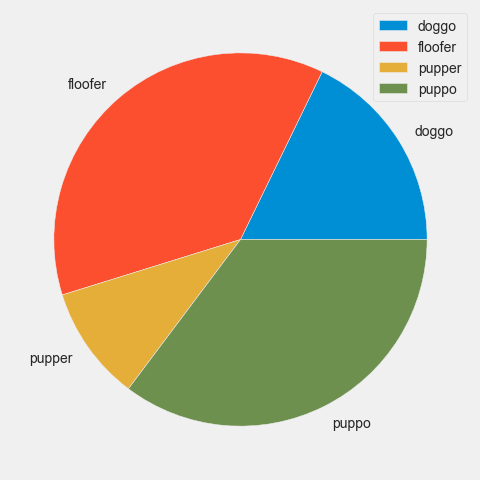

In [199]:
# visualizing the result above using a pie chart
archive_master.groupby('dog_stage', as_index=False)['favorite_count'].mean().plot(kind='pie', y='favorite_count', labels=['doggo', 'floofer', 'pupper', 'puppo'])
plt.ylabel('')
plt.legend()
plt.show()

# Conclusion

> On average, the most preferred dog stage is:
> * floofer

![Floofer](floofer.png)

>  In order of preference, the remaining dog stage are:
> * puppo
> * doggo
> * pupper


##  Question 4: How has WeRateDogs Tweets has being Shared over Time

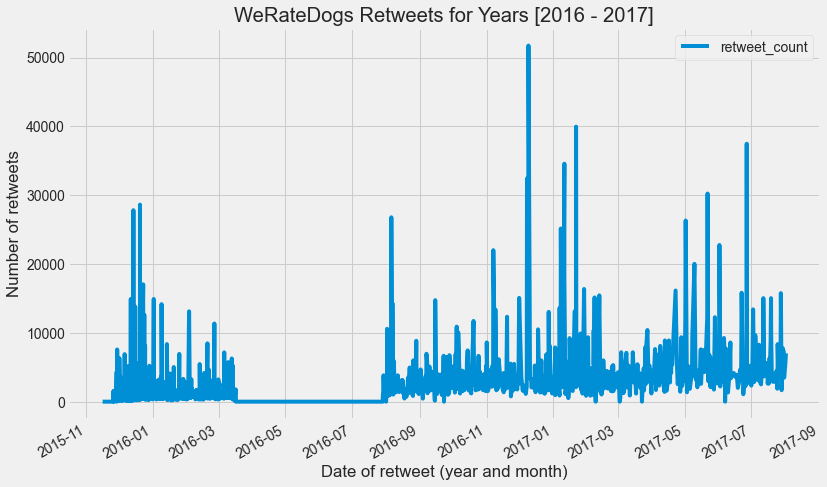

In [200]:
# plotting a line plot with timestamp on the x axis and retweet count on the y axis.
archive_master.plot(x='timestamp', y='retweet_count')
plt.xlabel('Date of retweet (year and month)')
plt.ylabel('Number of retweets')
plt.title('WeRateDogs Retweets for Years [2016 - 2017]')
plt.show()

# Conclusion

> From the above line plot, we see that the highest number retweets occurred in 2017 in the months of January, February and July and that the number of retweets of WeRateDogs tweets have generally being the same over the years.

> We also see that from the period of April 2016 to August 2016, there were no retweets made. 

# Insights

* the five most popularly Rated dog breeds are: `golden_retriever, labrador_retriever, pembroke, chihuahua, pug`
* the most used source for posting tweets on the WeRateDogs twitter account is: `Twitter for Iphone`
* On average, the most preferred dog stage is: `floofer`

## References


* https://gitlab.com/Medonati/udacity-data-analyst-nanodegree/-/blob/master/Project%204%3A%20Wrangle%20and%20Analyze/wrangle_act.ipynb

* https://docs.tweepy.org/en/latest/authentication.html#:~:text=To%20authenticate%20as%20a%20user%20other%20than%20your%20developer%20account,Developer%20Portal%20Projects%20%26%20Apps%20page.

* https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

* https://www.kaggle.com/code/msytnadeem/weratedogs-tweet-data-wrangling


